In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('ParisHousing.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [10]:
X = df.drop(['cityCode'], axis=1).values
y = df['cityCode'].values

In [13]:
X

array([[7.5523000e+04, 3.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.0000000e+00, 7.5590815e+06],
       [8.0771000e+04, 3.9000000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        2.0000000e+00, 8.0859895e+06],
       [5.5712000e+04, 5.8000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        9.0000000e+00, 5.5746421e+06],
       ...,
       [8.3841000e+04, 3.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        9.0000000e+00, 8.3900305e+06],
       [5.9036000e+04, 7.0000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        4.0000000e+00, 5.9051070e+06],
       [1.4400000e+03, 8.4000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        6.0000000e+00, 1.4670840e+05]])

In [15]:
y

array([ 9373, 39381, 34457, ..., 80933, 55856, 18412], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [18]:
y_pred

array([47146. , 41483.8, 56988.4, ..., 43373.8, 39060.2, 30981. ])

In [19]:
mean_squared_error(y_pred, y_test) ** (1/2)

32018.08303631534

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
mean_absolute_error(y_pred, y_test)

27236.58368

In [22]:
test = pd.DataFrame(y_test, columns=['y_test'])

In [23]:
test['y_pred'] = y_pred

In [24]:
test

,y_test,y_pred
0,35059,47146.0
1,57780,41483.8
2,83386,56988.4
3,53245,69104.0
4,4708,35754.8
...,...,...
2495,36822,30395.4
2496,26962,66784.6
2497,71012,43373.8
2498,75443,39060.2


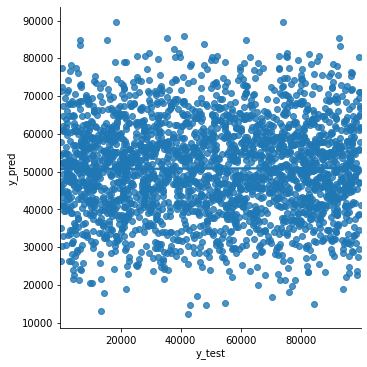

In [25]:
sns.lmplot(data=test, x='y_test', y='y_pred')

In [26]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = linear.predict(X_test)

In [28]:
mean_squared_error(y_pred, y_test)

862930309.2901211

In [29]:
mean_absolute_error(y_pred, y_test)

25642.017373995503

In [30]:
test['y_test'] = y_test
test['y_pred'] = y_pred

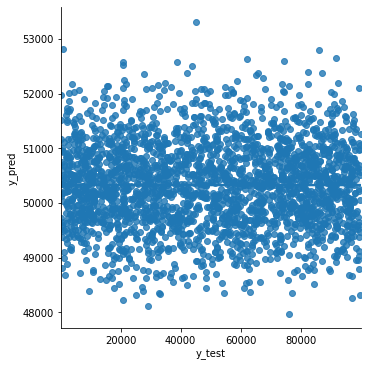

In [31]:
sns.lmplot(data=test, x='y_test', y='y_pred')